## Correlation Analysis

Load data from <b>Alpha Vantage</b> and calculate the correlation between stocks in the same sector (Communication services,  consumer staples, financials, etc.). The correlation will be calculated with 15-min and 30-min data in order to see the differences.

Alpha Vantage Limitations: 5 calls per minute and 500 calls per day.

#### Observations.
- 15-min and 30-min data correlation are very similar in Consumer Staples. I am going to use 30-min data to calculations.

In [1]:
from alpha_vantage.timeseries import TimeSeries
from matplotlib import pyplot as plt
import time
import mplfinance as mpf
import seaborn as sns
import pandas as pd
import datetime
import numpy as np

In [2]:
ts = TimeSeries(key='EM90IQSBJANXDHGE', output_format='pandas')

#### 5-mins

In [ ]:
data_5min, meta_data = ts.get_intraday(symbol='WMT',interval='5min', outputsize='full')

In [ ]:
data_5min.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
# data.iloc[::-1]. The data comes in reversal order (from old to newest data)
# "between_time". Filter data only when market is open

wmt_5min = data_5min.iloc[::-1].between_time('9:35', '16:05')

In [ ]:
# Substract 5 minutes from index. DateTime index comes with 5-mins shift

wmt_5min.index = wmt_5min.index + pd.Timedelta(minutes=-5)

In [ ]:
mpf.plot(wmt_5min, type='candle', volume=True, show_nontrading=False, style='default', figscale=1.1, panel_ratios=(3,1))

#### 15-mins

In [ ]:
data_15min, meta_data = ts.get_intraday(symbol='WMT',interval='15min', outputsize='full')
data_15min.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
# data.iloc[::-1]. The data comes in reversal order (from old to newest data)
# "between_time". Filter data only when market is open

wmt_15min = data_15min.iloc[::-1].between_time('9:45', '16:15')

In [ ]:
# Substract 15 minutes from index. DateTime index comes with 15-mins shift

wmt_15min.index = wmt_15min.index + pd.Timedelta(minutes=-15)

In [ ]:
mpf.plot(wmt_15min, type='candle', volume=True, show_nontrading=False, style='default', figscale=1.1, panel_ratios=(3,1))

#### 30-mins

In [ ]:
data_30min, meta_data = ts.get_intraday(symbol='WMT',interval='30min', outputsize='full')
data_30min.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
# data.iloc[::-1]. The data comes in reversal order (from old to newest data)
# "between_time". Filter data only when market is open

wmt_30min = data_30min.iloc[::-1].between_time('9:45', '16:30')

In [ ]:
# Substract 30 minutes from index. DateTime index comes with 30-mins shift

wmt_30min.index = wmt_30min.index + pd.Timedelta(minutes=-30)

In [ ]:
# mpf.plot(wmt_30min, type='candle', volume=True, show_nontrading=False, style='default', figscale=1.1, panel_ratios=(3,1))

## Analisis with 15-min data

### Consumer Staples

In [3]:
# Kellogg's - Kimberly-Clark - Kroger - Procter & Gamble - Walmart
consumer_staples = ['CAG', 'CL', 'CLX', 'DG', 'GIS', 'K', 'KDP', 'KMB', 'KR', 'PG', 'WMT']

In [4]:
# "data": Dictionary. Each item is a DataFrame.
data = {}

for item in consumer_staples:
    # Get data from AlphaVantage
    df, meta_data = ts.get_intraday(symbol=item, interval='15min', outputsize='full')
    
    # Rename Columns and Index names
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index.name = 'Date'
    
    # Reverse data and select time interval only into market open 
    df = df.iloc[::-1].between_time('9:45', '16:15')
    
    # Substract 15 minutes shift.
    df.index = df.index + pd.Timedelta(minutes=-15)
    
    # Save into dictionary
    data[item] = df
    
    # Sleep for loop execution if I am going to do more than 5 request/min.
    time.sleep(10)

In [5]:
# 15-min returns calculation in each DataFrame

for stock, df in data.items():
    df['Return'] = df['Close'].pct_change(periods=1, fill_method='pad', limit=None)

In [6]:
# Concatenate in one single DataFrame all 30-min Returns

return_staples = pd.DataFrame()

for stock, df in data.items():
    return_staples = pd.concat([return_staples, data[stock]['Return']], axis=1)

In [7]:
# Rename columns
return_staples.columns = consumer_staples

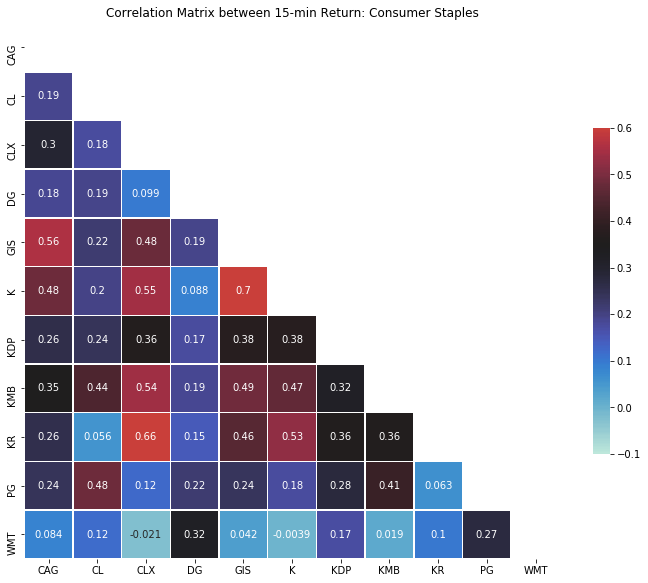

In [8]:
# Correlation Matrix
matrix_corr_return_staples = return_staples.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix_corr_return_staples, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix_corr_return_staples, mask=mask, vmin=-0.1 , vmax=0.6, center=0.35,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.title('Correlation Matrix between 15-min Return: Consumer Staples');

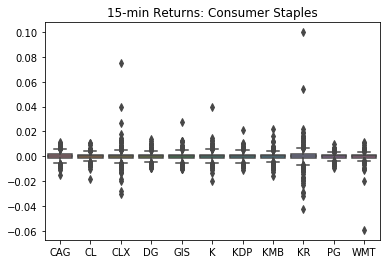

In [9]:
# BoxPlot

sns.boxplot(data=return_staples.dropna());
plt.title('15-min Returns: Consumer Staples');

## Analisis with 30-min data

### Consumer Staples

In [3]:
# Kellogg's - Kimberly-Clark - Kroger - Procter & Gamble - Walmart
consumer_staples = ['CAG', 'CL', 'CLX', 'DG', 'GIS', 'K', 'KDP', 'KMB', 'KR', 'PG', 'WMT']

In [4]:
# "data": Dictionary. Each item is a DataFrame.
data = {}

for item in consumer_staples:
    # Get data from AlphaVantage
    df, meta_data = ts.get_intraday(symbol=item, interval='30min', outputsize='full')
    
    # Rename Columns and Index names
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index.name = 'Date'
    
    # Reverse data and select time interval only into market open 
    df = df.iloc[::-1].between_time('9:45', '16:30')
    
    # Substract 30 minutes shift.
    df.index = df.index + pd.Timedelta(minutes=-30)
    
    # Save into dictionary
    data[item] = df
    
    # Sleep for loop execution if I am going to do more than 5 request/min.
    time.sleep(12)

In [5]:
# 30-min returns calculation in each DataFrame

for stock, df in data.items():
    df['Return'] = df['Close'].pct_change(periods=1, fill_method='pad', limit=None)

In [6]:
# Concatenate in one single DataFrame all 30-min Returns

return_staples = pd.DataFrame()

for stock, df in data.items():
    return_staples = pd.concat([return_staples, data[stock]['Return']], axis=1)

In [7]:
# Rename columns
return_staples.columns = consumer_staples

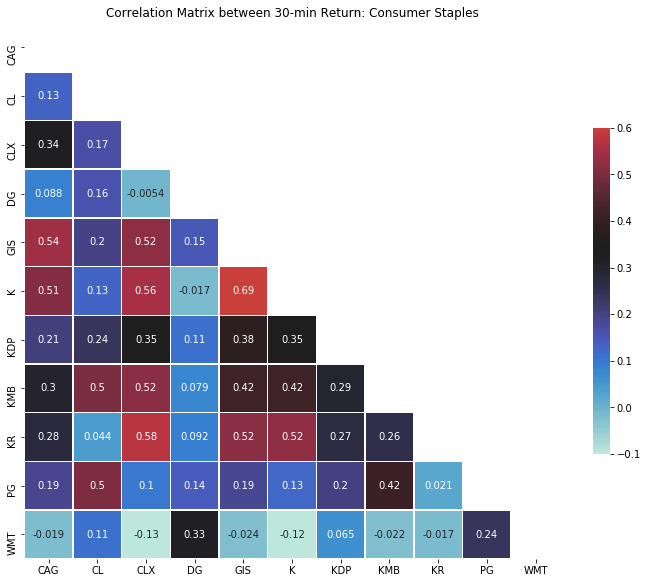

In [8]:
# Correlation Matrix
matrix_corr_return_staples = return_staples.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix_corr_return_staples, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix_corr_return_staples, mask=mask, vmin=-0.1 , vmax=0.6, center=0.35,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.title('Correlation Matrix between 30-min Return: Consumer Staples');

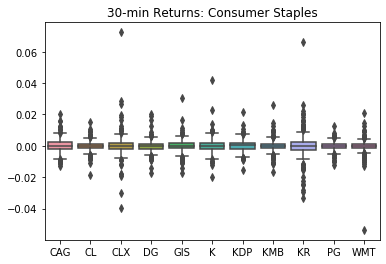

In [9]:
# BoxPlot

sns.boxplot(data=return_staples.dropna());
plt.title('30-min Returns: Consumer Staples');

In [10]:
# Average Pearson Coefficient

((matrix_corr_return_staples.sum(axis=1) - 1)/len(return_staples)).sort_values()

WMT    0.001040
DG     0.002899
PG     0.005442
CL     0.005597
KDP    0.006329
KR     0.006554
CAG    0.006578
CLX    0.007645
K      0.008105
KMB    0.008127
GIS    0.009171
dtype: float64

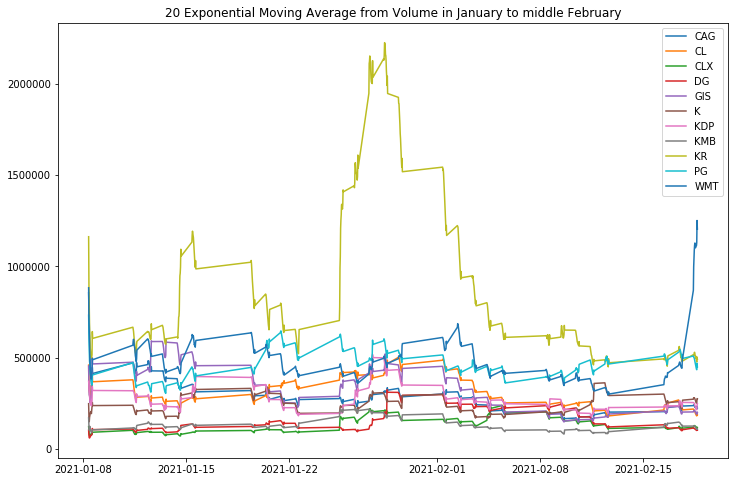

In [38]:
# Plot volumes
fig, ax = plt.subplots(figsize=(12, 8));

for stock, df in data.items():
    ax.plot(df['Volume'].ewm(20).mean(), label=stock);

plt.title('20 Exponential Moving Average from Volume in January to middle February');
plt.legend();

In [29]:
# Concatenate in one single DataFrame all 30-min Volumes

volume_staples = pd.DataFrame()

for stock, df in data.items():
    volume_staples = pd.concat([volume_staples, data[stock]['Volume']], axis=1)

In [31]:
# Rename columns
volume_staples.columns = consumer_staples

In [34]:
volume_staples.mean().sort_values()

KMB    132761.510204
CLX    137605.681122
DG     160449.168367
K      242823.846939
CAG    267928.306122
KDP    269572.357143
CL     303846.596939
GIS    311914.344388
PG     462324.591837
WMT    523625.609694
KR     882288.372449
dtype: float64

#### Pre-selected
The criteria to select these pairs of stocks are high Correlation and highest Volume.
- KR - GIS
- PG - CL